# CAPSTONE 2 
- NYC TLC Trip Record
- NURMARYO ANGGITO
- JCDS 2204

# PENDAHULUAN

## LATAR BELAKANG

Data ini adalah rekaman transaksi perjalanan taksi di Kota New York, Data ini mencakup informasi tentang rincian perjalanan, jumlah tarif, jumlah penumpang, dan lainnya. Sebagai data analyst internal pada LPEP provider(taxi fleet owner). 

Hasil dari analisis data ini diharapkan dapat memberikan informasi berharga bagi penyedia layanan taksi. Informasi yang diperoleh dapat memberikan kontribusi pada proses pengambilan keputusan untuk meningkatkan layanan kepada pelanggan dan juga meingkatkan pendapatan untuk perusahaan dan kesejahteraan pengemudi taksi. Proses analisis dilakukan dengan beberapa tahap yaitu, pertama melakukan data cleaning, kemudian mencari problem yang dapat dihasilkan dari dataset, selanjutnya membuat visualisasi sesuai dataset, dan terakhir memberikan saran yang dapat dipresentasikan kepada penyedia layanan taksi.


## PROBLEMS
- Bagaimana meningkatkan efektifitas distribusi armada taksi berdasarkan waktu?. untuk meningkatkan pendapatan pengemudi dan perusahaan.
- Metode pembayaran apa yang paling banyak digunakan?
- Bagaimana gambaran distribusi transaksi perjalanan berdasarkan lokasi?
- Bagaimana meningkatkan pendapatan tip driver? 

## GOALS
Untuk meningkatkan pendapatan perusahaan dan kesejahteraan pengemudi dengan meningkatkan efektifitas dan efisiensi dalam penyebaran armada taksi

- Analisis Berbasis Waktu:
    - Meneliti pola perjalanan taksi berdasarkan waktu, mengidentifikasi jam sibuk dan hari dalam seminggu dengan permintaan tinggi. Menyarankan strategi untuk mengelola penempatan armada secara efektif selama periode tertentu.
- Analisis Tipe Pembayaran:
    - Menyelidiki jenis pembayaran yang berbeda secara keseluruhan. Mengidentifikasi aspek untuk perbaikan dalam proses pembayaran.
- Analisis Berbasis Lokasi:
    - Mengeksplorasi distribusi penjemputan dan penurunan taksi di berbagai lokasi (PULocationID dan DOLocationID), mengidentifikasi area lalu lintas tinggi dan mengoptimalkan alokasi sumber daya.
- Analisis Tip 
    - Analisis katergori trip seperti apa yang memiliki potensi tips yang tinggI.

# DATA UNDERSTANDING


### COLUMN DESCRIPTION DATAFRAME UTAMA
- VendorID: Perusahaan yang memiliki armada taksi merekam data transaksi perjalanan taksi
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc.
- lpep_pickup_datetime: tanggal dan waktu saat argometer taksi dinyalakan bisa juga di artikan saat penumpang masuk atau perjalanan dimulai
- lpep_dropoff_datetime: tanggal dan waktu saat argometer taksi dimatikan bisa juga di artikan saat penumpang turun atau perjalanan selesai
- store_and_fwd_flag: Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirimkan ke vendor.
    - Y = data disimpan
    - N = data tidak disimpan
- RatecodeID: Kode numerik yang menunjukkan kode tarif untuk perjalanan 
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride
- PULocationID: Pengidentifikasi lokasi penjemputan yang sesuai dengan area geografis tertentu.
- DOLocationID: Pengidentifikasi lokasi penurunan yang sesuai dengan area geografis tertentu.
- passenger_count: Jumlah penumpang dalam taksi.
- trip_distance: Jarak perjalanan dalam mil.
- fare_amount: Jumlah yang dibebankan untuk perjalanan sebelum biaya tambahan.
- extra: Biaya tambahan (misalnya, biaya jam sibuk atau biaya penginapan).
- mta_tax: Pajak Otoritas Transportasi Metropolitan (MTA) ($0.5 otomatis ditambahkan berdasarkan rate).
- tip_amount: Jumlah tip (otomatis ditambahkan jika menggunakan kartu kredit, cash tidak dihitung).
- tolls_amount: Biaya tol selama perjalanan.
- ehail_fee: Biaya terkait layanan e-hailing (E-Hail (pemesanan elektronik) memungkinkan seorang penumpang menggunakan aplikasi berlisensi TLC untuk memesan taksi kuning atau Street-Hail Livery (taksi hijau) menggunakan tarif resmi. E-Hail hanya berlaku untuk taksi kuning dan taksi hijau.).
- improvement_surcharge: Biaya peningkatan.
- total_amount: Jumlah total yang dibayarkan oleh penumpang kecuali tip dengan cash.
- payment_type: Tipe pembayaran yang digunakan (misalnya, kartu kredit, tunai).
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
- trip_type: Jenis perjalanan (misalnya, street-hail, dispatch).
    - 1 = Street-hail
    - 2 = Dispatch
- congestion_surcharge: Biaya tambahan untuk tarif kepadatan lalu lintas.

### COLUMN DESCRIPTION DATAFRAME TAMBAHAN NYC TAXI ZONES
dataset zones digunakan untuk menampilkan detail lokasi dan menjelaskan lokasi, kareana dalam dataframe awal data lokasi yaitu 'PULocationID' dan 'DOLocationID' berbentuk angka yand tidak ada nama lokasi.
- OBJECTID: Pengidentifikasi untuk setiap catatan atau observasi dalam dataset. Kemungkinan merupakan pengidentifikasi unik untuk setiap baris.
- Shape_Leng: Nilai numerik yang mewakili panjang dari bentuk geometris, kemungkinan terkait dengan geometri atau fitur spasial.
- the_geom: Sebuah kolom yang berisi informasi geometris atau spasial. Ini mungkin menyimpan geometri sebenarnya (koordinat) dari objek spasial.
- Shape_Area: Nilai numerik yang mewakili luas dari bentuk, kemungkinan terkait dengan geometri atau fitur spasial.
- zone: Variabel kategorikal yang mewakili zona atau wilayah. Ini bisa menjadi label atau pengidentifikasi untuk area geografis tertentu.
- LocationID: Pengidentifikasi untuk lokasi. Serupa dengan OBJECTID, ini dapat digunakan untuk mengidentifikasi dengan unik setiap lokasi atau zona.
- borough: Variabel kategorikal yang mewakili borough (daerah) yang terkait dengan zona atau lokasi. 

# DATA PREPARATION

In [68]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import scipy
import scipy.stats as stats
from scipy.stats import mannwhitneyu


DATA ASLI NYC TLC Trip Record

In [69]:
Data_Raw = pandas.read_csv("NYC TLC Trip Record.csv")
Data_Raw

C:\Users\toto\AppData\Local\Temp\ipykernel_7244\1394785366.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_Raw = pandas.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


cek data type

In [70]:
Data_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

convert datatype lpep_pickup_datetime dan lpep_dropoff_datetime dari object menjadi datetime

In [71]:
Data_Raw['lpep_pickup_datetime'] = pandas.to_datetime(Data_Raw['lpep_pickup_datetime'])
Data_Raw['lpep_dropoff_datetime'] = pandas.to_datetime(Data_Raw['lpep_dropoff_datetime'])


cek null value

In [72]:
Data_Raw.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### Menghapus kolom ehail_fee
kolom ehail_fee di drop karena value null semua degan asumsi tidak ada yang memakai aplikasi ehail


In [73]:
Data_Clean = Data_Raw

Data_Clean.dropna(axis=1, how='all', inplace=True)


In [74]:
cek_null = Data_Raw[Data_Raw['passenger_count'].isna()]
cek_null


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


### Menghapus null value 
- cek proporsi null value
    - cek_null = data dengan null value
    - Data_Raw = data secara keseluruhan

In [75]:
proporsi_null = (len(cek_null)/len(Data_Raw))*100
proporsi_null

6.33915350896483

- karena jumlah proporsi null value pada data hanya dibawah 10 % atau sekitar 6.3% maka data tersebut akan saya drop
- trip_type akan di drop karena proporsi sangat kecil

In [76]:
Data_Clean.dropna(subset=['passenger_count'],inplace=True)
Data_Clean.dropna(subset=['trip_type'],inplace=True)

Data_Clean.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

mengecek duplikat

In [77]:
Data_Clean.duplicated().sum()

0

tidak ada data duplikat

In [78]:
Data_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


notes
- total_amount = fare_amount+extra+mta_tax+tip_amount+tolls_amount+improvement_surcharge+congestion_surcharge


membuat kolom trip duration column dalam menit

In [79]:
Data_Clean['Trip_Duration'] = Data_Clean['lpep_dropoff_datetime'] - Data_Clean['lpep_pickup_datetime']
Data_Clean['Trip_Duration'] = round(Data_Clean['Trip_Duration'].dt.total_seconds() / 60,2)

Data_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.77
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,6.33
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.53


cek data untuk bulan januari 2023 menggunakan lpep_pickup_datetime 

In [80]:
Data_Clean[(Data_Clean['lpep_pickup_datetime'] < pandas.to_datetime('2022-12-31 23:59:59')) 
         | (Data_Clean['lpep_pickup_datetime'] > pandas.to_datetime('2023-1-31 23:59:59'))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,0.0,0.5,0.00,0.00,0.3,16.80,2.0,1.0,0.00,11.62
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,0.0,0.5,0.00,6.55,0.3,35.60,2.0,1.0,2.75,37.40
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,0.0,0.5,7.20,0.00,1.0,43.20,1.0,1.0,0.00,886.07
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,0.0,0.0,5.66,0.00,0.3,33.96,1.0,2.0,0.00,30.50


filter datatime pickup time hanya bulan januari 2023 karena data mayoritas ada di bulan januari 2023, hanya ada 4 data yang diluar januari 2023

In [81]:
Data_Clean = Data_Clean[(Data_Clean['lpep_pickup_datetime'] > pandas.to_datetime('2022-12-31 23:59:59')) 
         & (Data_Clean['lpep_pickup_datetime'] < pandas.to_datetime('2023-1-31 23:59:59'))]


cek trip distance

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.0,6.33
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,1.0,0.5,1.38,0.0,1.0,8.28,1.0,1.0,0.0,3.00
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,0.0,0.0,0.00,0.0,1.0,21.00,1.0,2.0,0.0,0.12
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,1.0,0.5,9.00,0.0,1.0,14.50,1.0,1.0,0.0,0.38
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,1.0,0.5,21.50,0.0,0.3,26.30,1.0,1.0,0.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63798,2,2023-01-31 22:19:41,2023-01-31 22:27:59,N,1.0,42,152,1.0,0.0,8.6,1.0,0.5,0.00,0.0,1.0,11.10,2.0,1.0,0.0,8.30
63813,2,2023-01-31 22:29:03,2023-01-31 22:35:11,N,1.0,95,95,2.0,0.0,7.2,1.0,0.5,0.00,0.0,1.0,9.70,2.0,1.0,0.0,6.13
63833,2,2023-01-31 22:43:19,2023-01-31 22:46:09,N,5.0,130,130,1.0,0.0,10.0,0.0,0.0,0.00,0.0,1.0,11.00,2.0,2.0,0.0,2.83
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.0,-10.0,0.0,0.0,0.00,0.0,-1.0,-11.00,4.0,2.0,0.0,0.52


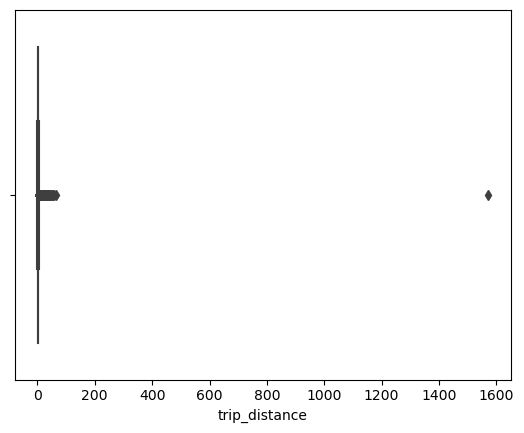

In [82]:
seaborn.boxplot(x=Data_Clean['trip_distance'])
Data_Clean[Data_Clean['trip_distance'] == 0]

data yang memiliki trip distance 0, akan dihapus karena dianggap transaksi gagal atau tidak jadi mengantar dan cek trip distance terjauh

In [83]:
Data_Clean = Data_Clean[Data_Clean['trip_distance'] != 0]
Data_Clean['trip_distance'].sort_values(ascending=False)

33373    1571.97
7322       66.18
43013      57.09
48770      53.72
30501      48.70
          ...   
42766       0.01
42849       0.01
49301       0.01
4821        0.01
43374       0.01
Name: trip_distance, Length: 60676, dtype: float64

- karena ada 1 data outlier pada kolom trip_distance dengan nilai yang sangat jauh (diatas 1500) sedangkan data memiliki nilai 
rata2/mean = 2.58 dan nilai median = 1.8 maka data tersebut bisa di hilangkan
- proses menghilangkan 1 outlier tersebut

In [84]:
Data_Clean = Data_Clean[Data_Clean['trip_distance']<1500]
Data_Clean.sort_values(by='trip_distance',ascending=False)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,0.0,0.0,0.00,0.0,1.0,18.75,2.0,1.0,2.75,378.58
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,0.0,0.5,0.00,0.0,1.0,206.80,2.0,1.0,0.00,68.48
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,0.0,0.0,0.00,0.0,1.0,3.76,2.0,1.0,2.75,1247.75
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,0.0,0.0,0.10,0.0,1.0,141.10,1.0,2.0,0.00,46.17
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.50,0.0,0.5,0.00,0.0,1.0,260.00,2.0,1.0,0.00,53.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,2,2023-01-06 23:59:07,2023-01-06 23:59:11,N,1.0,74,74,1.0,0.01,3.00,1.0,0.5,0.00,0.0,1.0,5.50,2.0,1.0,0.00,0.07
62494,2,2023-01-31 12:20:56,2023-01-31 12:22:04,N,1.0,43,43,1.0,0.01,3.00,0.0,0.5,0.00,0.0,0.3,3.80,2.0,1.0,0.00,1.13
43269,2,2023-01-22 13:13:49,2023-01-22 13:13:51,N,1.0,42,264,1.0,0.01,3.00,0.0,0.5,0.00,0.0,1.0,4.50,2.0,1.0,0.00,0.03
34327,2,2023-01-18 10:46:29,2023-01-18 11:04:40,N,1.0,102,102,1.0,0.01,15.60,0.0,0.5,5.13,0.0,1.0,22.23,1.0,1.0,0.00,18.18


cek total amount nilai negatif, dan ignore nilai negatif karena tipe pembayaran dispute atau ada masalah dalam proses pembayaran. Tentang cara pembayaran, harga, atau masalah lainnya

In [85]:
Data_Clean = Data_Clean[Data_Clean['total_amount']>0]
Data_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.53


In [86]:
#  kolom pendapatan per menit
Data_Clean['Income_per_minute'] = round(Data_Clean['total_amount']/Data_Clean['Trip_Duration'],2)
Data_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip_Duration,Income_per_minute
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.02,2.19
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.77,2.34
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.82,1.75
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.97,1.34
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.55,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.98,2.17
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.75,1.79
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.02,2.35
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.53,2.36


saya menambahkan dataframe external untuk menjelaskan lokasi, kareana dalam dataframe awal data lokasi yaitu 'PULocationID' dan 'DOLocationID' berbentuk angka yand tidak ada nama lokasi. 

In [87]:
zones = pandas.read_csv('taxi_zones.csv')
zones

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


- melakukan merge dataframe utama yang sudah di clean/proses dengan dataframe zones untuk mendapatkan detail lokasi setiap perjalanan
- merge antara zones.OBJECTID dengan Data_Clean.PULocationID (lokasi pickup) dan Data_Clean.DOLocationID (lokasi dropoff)
- setelah itu di cek untuk menemukan anomali pada data

In [88]:
Data_Clean = pandas.merge(Data_Clean,zones,left_on='PULocationID',right_on='OBJECTID',how='left')
Data_Clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Trip_Duration,Income_per_minute,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,11.02,2.19,166.0,0.068824,MULTIPOLYGON (((-73.95707738499995 40.81429809...,0.000255,Morningside Heights,166.0,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,6.77,2.34,24.0,0.047000,MULTIPOLYGON (((-73.95953658899997 40.79871852...,0.000061,Bloomingdale,24.0,Manhattan
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,5.82,1.75,41.0,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41.0,Manhattan
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,5.97,1.34,41.0,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41.0,Manhattan
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2.75,17.55,1.31,41.0,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60556,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.00,7.98,2.17,130.0,0.142028,MULTIPOLYGON (((-73.76962552399995 40.71178631...,0.000468,Jamaica,130.0,Queens
60557,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.00,10.75,1.79,65.0,0.044607,MULTIPOLYGON (((-73.98712491499988 40.70063447...,0.000082,Downtown Brooklyn/MetroTech,65.0,Brooklyn
60558,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.00,6.02,2.35,244.0,0.080569,MULTIPOLYGON (((-73.94068822000003 40.85131543...,0.000360,Washington Heights South,244.0,Manhattan
60559,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,2.75,9.53,2.36,74.0,0.110291,MULTIPOLYGON (((-73.93380589881859 40.81651249...,0.000295,East Harlem North,74.0,Manhattan


cek anomali data pada dataframe yang sudah di merge

In [89]:
Data_Clean.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
Trip_Duration             0
Income_per_minute         0
OBJECTID                 54
Shape_Leng               54
the_geom                 54
Shape_Area               54
zone                     54
LocationID               54
borough                  54
dtype: int64

- cek apakah nilai yang null ada pada baris yang sama

In [90]:
Data_Clean[Data_Clean['zone'].isna()].isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
Trip_Duration             0
Income_per_minute         0
OBJECTID                 54
Shape_Leng               54
the_geom                 54
Shape_Area               54
zone                     54
LocationID               54
borough                  54
dtype: int64

- terdapat 54 data dengan kolom 'OBJECTID, Shape_Leng, the_geom, Shape_Area, zone, LocationID, dan borough' memiliki nilai null karena kolom 'PULocationID' memiliki nilai yang tidak ada pada dataframe zone sehingga nilai kolom-kolom tersebut bernilai null.
- saya berasumsi data tersebut melakukan pickup di luar kota New York.
- sehingga saya akan melakukan drop pada data tersebut.

In [91]:
Data_Clean.dropna(subset=['zone'],inplace=True)
display(Data_Clean.isna().sum())
display(Data_Clean.duplicated().sum())

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
Trip_Duration            0
Income_per_minute        0
OBJECTID                 0
Shape_Leng               0
the_geom                 0
Shape_Area               0
zone                     0
LocationID               0
borough                  0
dtype: int64

0

In [92]:
# export data yang sudah merge dan clean
Data_Clean.to_csv('Data_utama_capstone_2.csv',index=False)

- dataframe data_loc_PU sudah tidak ada null value dan duplicate

## PROSES CLEANING DATA AWAL
- convert datatype lpep_pickup_datetime dan lpep_dropoff_datetime dari object menjadi datetime
- Menghapus kolom ehail_fee, kolom ehail_fee di drop karena value null semua degan asumsi tidak ada yang memakai aplikasi ehail
- Menghapus null value data yang memiliki trip distance 0, akan dihapus karena dianggap transaksi gagal atau tidak jadi mengantar dan cek trip distance terjauh
    - karena jumlah proporsi null value pada data hanya dibawah 10 % atau sekitar 6.3% maka data tersebut akan saya drop
    - trip_type akan di drop karena proporsi sangat kecil
- mengecek duplikat (tidak ada duplikat)
- membuat kolom trip duration column dalam menit
- filter pickup time
    - filter datatime pickup time hanya bulan januari 2023 karena data mayoritas ada di bulan januari 2023, hanya ada 4 data yang diluar januari 2023
    - - karena ada 1 data outlier pada kolom trip_distance dengan nilai yang sangat jauh (diatas 1500) sedangkan data memiliki nilai 
rata2/mean = 2.58 dan nilai median = 1.8 maka data tersebut bisa di hilangkan
- hilangkan nilai negatif karena tipe pembayaran dispute atau ada masalah dalam proses pembayaran. Tentang cara pembayaran, harga, atau masalah lainnya
- saya menambahkan dataframe external untuk menjelaskan lokasi, kareana dalam dataframe awal data lokasi yaitu 'PULocationID' yang berbentuk angka yand tidak ada nama lokasi. 
    - melakukan merge dataframe utama yang sudah di clean/proses dengan dataframe zones untuk mendapatkan detail lokasi setiap perjalanan
    - merge antara zones.OBJECTID dengan Data_Clean.PULocationID (lokasi pickup) dan Data_Clean.DOLocationID (lokasi dropoff)
- setelah itu di cek untuk menemukan anomali pada data
    - terdapat 54 data dengan kolom 'OBJECTID, Shape_Leng, the_geom, Shape_Area, zone, LocationID, dan borough' memiliki nilai null karena kolom 'PULocationID' memiliki nilai yang tidak ada pada dataframe zone sehingga nilai kolom-kolom tersebut bernilai null.
    - saya berasumsi data tersebut melakukan pickup di luar kota New York.
    - sehingga saya akan melakukan drop pada data tersebut.
- data yang sudah bersih = 60505 data dari data awal = 68211 data jadi total pengurangan data adalah 11.3%

# ANALYSIS

## 1. ANALISIS MANAJEMEN WAKTU

### Proses pembuatan dataframe baru dan uji statistik

- Analisis jumlah perjalanan yang dibagi berdasarkan waktu (jam dan hari)
- bertujuan untuk analisis bagaimana distribusi perjalanan pada waktu tertentu
- saya menggunakan pick up time karena data lebih konsisten dibandingkan menggunakan waktu drop off karena ada kemungkinan ada proses pembayaran ketika tidak di dalam taksi, seperti ketika menggunakan credit card. Dan waktu pickup juga bisa menjelaskan jumlah permintaan pada waktu tertentu.
- Proses analisis :
    - extract kolom jam dan nama hari dari lpep_pickup_datetime
    - dataframe baru yang berisi jumlah transaksi yang dikelompokan berdasarkan jam pickup dan hari pickup (average_per_day)
    - uji normalitas untuk dataframe average_per_day
        - menggunakan saphiro test karena data non parametrik (data>30)
        - membuat grafik histogram untuk melihat bentuk distribusi data quantity trip_per_hour
    - kelompokan data berdasarkan weekdays dan weekend
    - Uji Mann-Whitney U untuk membandingkan median jumlah perjalanan antara weekday dan weekend. Ini adalah uji non-parametrik untuk dua kelompok independen.

C:\Users\toto\AppData\Local\Temp\ipykernel_7244\3727716151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Clean['PU_hour'] = Data_Clean['lpep_pickup_datetime'].dt.hour
C:\Users\toto\AppData\Local\Temp\ipykernel_7244\3727716151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Clean['PU_day'] = Data_Clean['lpep_pickup_datetime'].dt.day_name()


Statistik uji: 0.9388267993927002, P-value: 1.3147546269465238e-06
Data tidak berdistribusi normal.


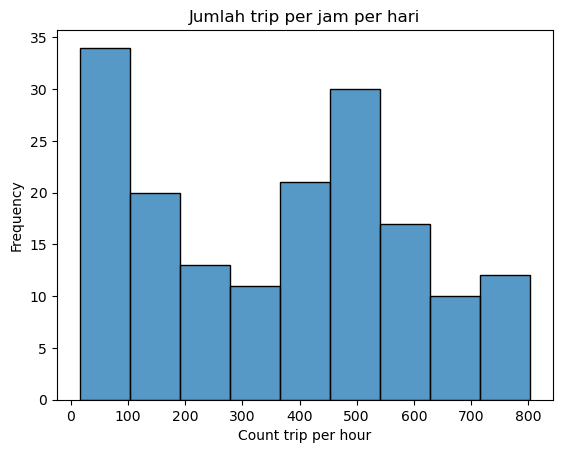

In [102]:
Data_Clean['PU_hour'] = Data_Clean['lpep_pickup_datetime'].dt.hour
Data_Clean['PU_day'] = Data_Clean['lpep_pickup_datetime'].dt.day_name()
trip_per_day = Data_Clean.groupby(['PU_day','PU_hour']).size().reset_index(name='Trip_per_hour')

# cek distribusi data
# saphiro test untuk uji normalitas data
statistic, p_value = scipy.stats.shapiro(trip_per_day['Trip_per_hour'])

print(f'Statistik uji: {statistic}, P-value: {p_value}')


if p_value > 0.05:
    print("Data berdistribusi normal.")
else:
    print("Data tidak berdistribusi normal.")

# uji normalitas berdasarkan bentuk histogram
seaborn.histplot(trip_per_day['Trip_per_hour'])
plt.title('Jumlah trip per jam per hari')
plt.xlabel('Count trip per hour')
plt.ylabel('Frequency')
plt.show()




- Shapiro-Wilk Test Statistic: 0.9387916922569275,
P-value: 1.3063723827144713e-06,
Data tidak berdistribusi normal.
- dengan hasil tersebut maka menggunakan median sebagai nilai tengah nya karena distribusi tidak normal
- bentuk dari histogram juga tidak bell shaped atau distribusi tidak normal

### Visualisasi, analisis, dan insight

- visualisasi menggunakan median data 
    - hitung median perjalanan berdasarkan jam 
        - menggunakan median karena distribusi tidak normal, jika hanya menggunakan count bukan median jumlah hari weekend(2 hari) dan weekday(5 hari) maka data tidak akan seimbang, berpotensi weekday jauh lebih besar dari weekend dan tidak dapat direpresentasikan secara tepat
    - dipisahkan antara weekend dan weekday
    - uji mannwhitneyu anatara weekday dan weekend


Statistik uji Mann-Whitney U: 3308.5
P-value: 0.13290015131080163
Tidak ada perbedaan yang signifikan antara weekday dan weekend.


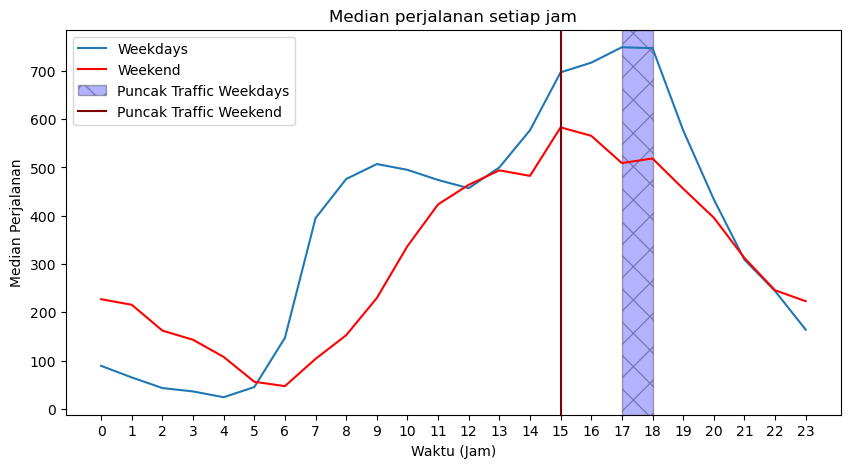

In [94]:
hour_count_week_day = trip_per_day[trip_per_day['PU_day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].sort_index()
hour_count_week_end = trip_per_day[trip_per_day['PU_day'].isin(['Saturday','Sunday'])].sort_index()

weekday_data = hour_count_week_day['Trip_per_hour']
weekend_data = hour_count_week_end['Trip_per_hour']

median_weekdays = hour_count_week_day.groupby('PU_hour')['Trip_per_hour'].median()
median_weekend = hour_count_week_end.groupby('PU_hour')['Trip_per_hour'].median()

# Uji Mann-Whitney U
statistic, p_value = mannwhitneyu(weekday_data, weekend_data)

# Tampilkan hasil uji
print('Statistik uji Mann-Whitney U:', statistic)
print('P-value:', p_value)

# Tentukan tingkat signifikansi (biasanya 0.05) untuk menentukan apakah hasil uji signifikan atau tidak
alpha = 0.05
if p_value < alpha:
    print('Terdapat perbedaan yang signifikan antara weekday dan weekend.')
else:
    print('Tidak ada perbedaan yang signifikan antara weekday dan weekend.')

plt.figure(figsize=(10,5))
plt.plot(median_weekdays.index,median_weekdays,label='Weekdays')
plt.plot(median_weekend.index,median_weekend,color='red',label='Weekend')

# export dataframe

trip_per_day.to_csv('Analisis_1.csv', index=False)


plt.xticks(median_weekend.index)
plt.title('Median perjalanan setiap jam')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Median Perjalanan')
plt.axvspan(17,18,facecolor="blue", edgecolor='black', hatch="x", alpha=0.3, label="Puncak Traffic Weekdays")
plt.axvline(15, color="maroon", linestyle="-", label="Puncak Traffic Weekend")


plt.legend()

INSIGHT TRIP PATERN BY TIME ANALYSIS 
- Hasil Uji statistik perbedaan median untuk data weekday dan weekend 
    - Statistik uji Mann-Whitney U: 3308.5
    - -value: 0.13290015131080163
    - Tidak ada perbedaan yang signifikan antara weekday dan weekend.
- secara umum transaki berada pada pukul 6 hingga pukul 20 karena aktifitas warga NYC berada pada rentan waktu tersebut
- hasil analisis grafik diatas adalah rata2 setiap hari per waktu dengan rata2 terbanyak di interval jam 7-10 untuk pagi hari jam 14-20 untuk sore hingga malam asumsi jam kerja warga NYC
- puncak dengan transaksi terbanyak ada pada weekdays jam 17-18 dan jam 15 untuk weekend
- rekomendasi saya, perusahaan bisa memperbanyak taxi, memperbanyak pekerja di bagian support, dan faisilitas pendukung lain untuk meningkatkan pelayanan pada waktu tertentu
- waktu tersebut adalah
    - di pukul 14 hingga 20 di weekend dan weekdays, dengan lebih banyak di weekdays
    - untuk pukul 20-04 weekend bisa lebih diperhatikan juga dibanding weekdays karena termasuk lebih ramai dibanding weekdays


## 2. ANALISIS TIPS DAN DISTANCE

- buat kolom baru untuk mengelompokan tip amount dan trip distance untuk mempermudah visualisasi
- untuk analisis potensi tips untuk driver berdasarkan durasi perjalanan
- tips dibandingkan dengan durasi perjalanan
- saya akan membatasi speed maksimal 65 mph sesuai dengan informasi berikut. Jika diatas 65 mph akan saya kategorikan overlimit.
- trip duration 0 akan didrop juga dengan asumsi tidak ada perjalanan.
- proses analisis
    - uji normalitas untuk tip dan distance untuk menentukan tes korelasi apa yang akan digunakan antara keduanya
    - uji korelasi spearman karena tip dan distance continous, distribusi tidak normal, non parametrik
    - gunakan median pada tip kareana distribusi tidak normal
    - visualisai
    - insight

In [95]:
bin = list(range(0,71,5))
labels = [f'{start}-{end}' for start, end in zip(bin[:-1], bin[1:])]

# drop trip duration = 0
Data_Clean = Data_Clean[Data_Clean['Trip_Duration'] != 0.00]

# hitung speed miles/hours
Data_Clean['speed'] = (Data_Clean['trip_distance']/Data_Clean['Trip_Duration'])*60
# tip interval
Data_Clean['tip_interval'] = pandas.cut(Data_Clean['tip_amount'],bins = bin,labels = labels,include_lowest=True)
# trip distance interval
Data_Clean['distance_interval'] = pandas.cut(Data_Clean['trip_distance'],bins = bin,labels = labels,include_lowest=True)




C:\Users\toto\AppData\Local\Temp\ipykernel_7244\842871147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Clean['speed'] = (Data_Clean['trip_distance']/Data_Clean['Trip_Duration'])*60
C:\Users\toto\AppData\Local\Temp\ipykernel_7244\842871147.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Clean['tip_interval'] = pandas.cut(Data_Clean['tip_amount'],bins = bin,labels = labels,include_lowest=True)
C:\Users\toto\AppData\Local\Temp\ipykernel_7244\842871147.py:12: SettingWithCopyWarning: 
A val

Uji normalitas tip dan distance
Uji korelasi antara tip dan distance

In [96]:
# uji normalitas tip
stat, p_value = stats.shapiro(Data_Clean['tip_amount'])

# Menampilkan hasil uji normalitas tip
print(f'Statistik uji: {stat}, P-value: {p_value}')

# Interpretasi hasil uji normalitas tip
alpha = 0.05
print('Uji Normalitas Tip')
if p_value > alpha:
    print("Data Tip terdistribusi normal (tidak ada bukti untuk menolak hipotesis null)")
else:
    print("Data Tip tidak terdistribusi normal (ada bukti untuk menolak hipotesis null)")

# uji normalitas distance
stat2, p_value2 = stats.shapiro(Data_Clean['trip_distance'])

# Menampilkan hasil uji normalitas distance
print(f'Statistik uji: {stat2}, P-value: {p_value2}')

# Interpretasi hasil uji normalitas distance
alpha = 0.05
print('Uji Normalitas Distance')
if p_value2 > alpha:
    print("Data Trip Distance terdistribusi normal (tidak ada bukti untuk menolak hipotesis null)")
else:
    print("Data Trip Distance tidak terdistribusi normal (ada bukti untuk menolak hipotesis null)")

# uji korelasi tip dengan distance
correlation_coefficient, p_value = stats.spearmanr(Data_Clean['tip_amount'], Data_Clean['trip_distance'])

# Menampilkan hasil uji
print(f'Koefisien Korelasi: {correlation_coefficient}, P-value: {p_value}')

# Interpretasi hasil uji korelasi
alpha = 0.05
if p_value < alpha:
    print("Ada bukti yang cukup untuk menolak hipotesis nol (terdapat korelasi).")
else:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol (tidak terdapat korelasi).")



c:\Users\toto\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistik uji: 0.6399201154708862, P-value: 0.0
Uji Normalitas Tip
Data Tip tidak terdistribusi normal (ada bukti untuk menolak hipotesis null)
Statistik uji: 0.6742236614227295, P-value: 0.0
Uji Normalitas Distance
Data Trip Distance tidak terdistribusi normal (ada bukti untuk menolak hipotesis null)
Koefisien Korelasi: 0.28006220380493, P-value: 0.0
Ada bukti yang cukup untuk menolak hipotesis nol (terdapat korelasi).


menggunakan median karena distribusi tip tidak normal

,distance_interval,tip_amount
0,0-5,1.52
1,5-10,3.00
2,10-15,1.11
3,15-20,2.00
4,20-25,0.00
5,25-30,0.00
6,30-35,21.30
7,35-40,0.00
8,40-45,0.00
9,45-50,0.05


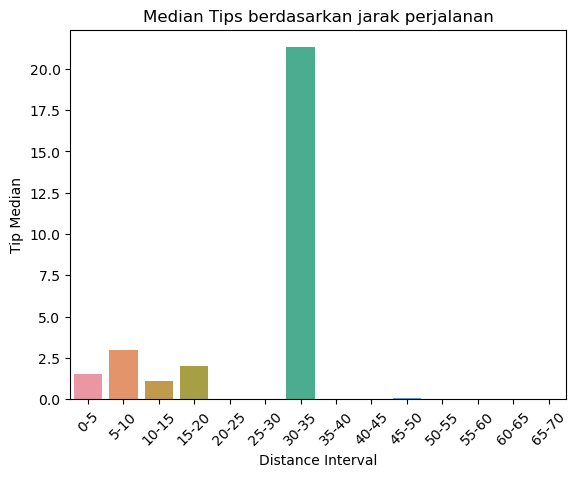

In [97]:

median_tip_by_distance = Data_Clean.groupby('distance_interval')['tip_amount'].median().reset_index()
median_tip_by_distance['tip_amount'] = median_tip_by_distance['tip_amount'].fillna(0)
display(median_tip_by_distance)
seaborn.barplot(median_tip_by_distance,x='distance_interval',y='tip_amount')
plt.xticks(rotation=45)
plt.xlabel('Distance Interval')
plt.ylabel('Tip Median')
plt.title('Median Tips berdasarkan jarak perjalanan')
plt.show

# export df
median_tip_by_distance.to_csv('Analisi_2.csv',index=False)

- Median tips paling besar ada pada interval jarak 30-35 miles. 
- Banyak terdapat nilai 0 karena tips tidak harus diberikan.
- Para pengemudi dapat mencari trip dengan jarak 30-35 miles untuk mendapatkan tip lebih besar, tetapi jangan sampai hanya memilih dengan tip tinggi, tip sedikit tetapi jumlah trip tingg seperti trip dengan jarak 0-20 juga bisa menjadi solusi meningkatkan income pengemudi.

## 3. Analisis proporsi payment method


- analisis proporsi payment method yang digunakan.
- berfungsi untuk meningkatkan efisiensi perjalanan dan mempermudah bagi penumpang dalam proses pembayaran dengan credit card
- proses analisis:
    - mengganti nilai pada kolom 'payment_type' dari numerikal dengan kategorial yang dijelaskan di atas
    - hitung jumalah transaksi untuk setiap payment type
    - visualisasikan dengan barplot
    - insight

In [98]:
payment = Data_Clean.groupby('payment_type').size().reset_index(name='payment_count')
replacement_list = ['Credit Card','Cash','No Charge','Dispute','Unknown','Voided Trip']
replacement_dict = {1:replacement_list[0],2:replacement_list[1],3:replacement_list[2],4:replacement_list[3],5:replacement_list[4],6:replacement_list[5]}
payment['payment_type'].replace(replacement_dict, inplace=True)
payment['percent'] = (round(payment['payment_count']/sum(payment['payment_count'])*100,2))

payment



,payment_type,payment_count,percent
0,Credit Card,38407,63.48
1,Cash,21824,36.07
2,No Charge,225,0.37
3,Dispute,49,0.08


<function matplotlib.pyplot.show(close=None, block=None)>

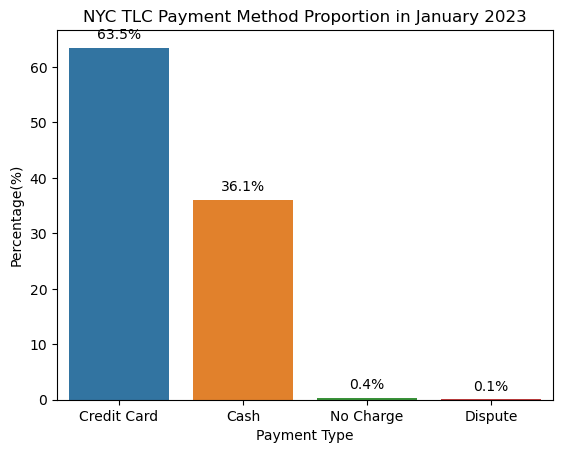

In [99]:
seaborn.barplot(payment,x='payment_type',y='percent')
plt.ylabel('Percentage(%)')
plt.xlabel('Payment Type')
plt.title('NYC TLC Payment Method Proportion in January 2023')
for i, percentage in enumerate(payment['percent']):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')
plt.show

INSIGHT PAYMENT TYPE ANALYSIS
- Penjelasan Data
    - metode pembayaran terbanyak menggunakan credit card dengan 63% dan cash dengan 36%
    - untuk no charge(gratis) atau dispute proporsi sangat kecil sehingga bisa di 
- Rekomendasi
    - saya sarankan untuk setiap taxi dipasangkan fasilitas pembayaran untuk credit card karena mayoritas penumpang membayar menggunakan credit card
    - untuk mendukung program cashless society di USA maka disarankan melakukan campaign untuk meningkatkan penggunaan credit card, link referensi berita = (https://apnews.com/article/fact-check-executive-order-research-digital-currency-690632388609)
    - campaign bisa dilakukan sosialisasi kelebihan penggunaan credit card kepada warga atau juga bisa memberikan promosi atau keuntungan lebih ketika menggunakan credit card

## 4. Analisis Berbasis Lokasi


- Analisis jumlah perjalanan berdasarkan lokasi tertentu di kota new york pada bulan januari 2023. 
- Untuk menentukan zona dengan jumlah transaksi terbanyak pada januari 2023.
- Menggunakan dataframe baru 'data_loc_PU' yaitu penggabungan dari dataframe utama yang sudah diproses(cleaing) dan sudah di gabung dengan dataframe zona taxi kota new york berdasarkan kolom 'PULocationID'. Dataframe zona taxi digunakan untuk mendapatkan detail lokasi yang belum ada di dataframe utama.
- saya hanya menggunakan 10 zona dengan jumlah transaksi terbanyak karena data tidak bisa ditampilkan semua
- proses analisis
    - hitung frekuensi trip untuk setiap zona
    - pilih 10 zona dengan jumlah transaksi terbanyak


In [100]:
data_trip_loc = Data_Clean.groupby(['zone']).size().reset_index(name='trip_per_loc').sort_values(by='trip_per_loc',ascending=False)
high = data_trip_loc.nlargest(10,'trip_per_loc')
display(high)



,zone,trip_per_loc
53,East Harlem North,12727
54,East Harlem South,8675
68,Forest Hills,3679
30,Central Harlem,3654
111,Morningside Heights,3577
32,Central Park,2834
60,Elmhurst,2791
69,Fort Greene,2079
1,Astoria,1640
166,Washington Heights South,1606


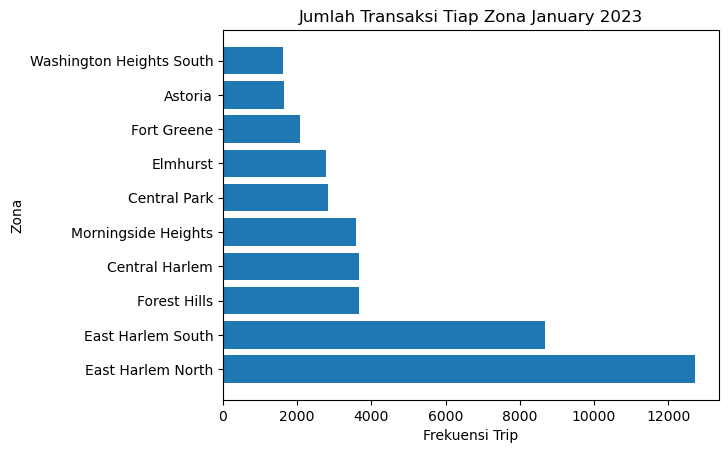

In [101]:
plt.barh(high['zone'],high['trip_per_loc'])
plt.xlabel('Frekuensi Trip')
plt.ylabel('Zona')
plt.title('Jumlah Transaksi Tiap Zona January 2023')
plt.show()

Insight
- zona dengan transaksi/demand terbanyak ada di east harlem south dan east harlem north dengan nilai sekitar 8000 dan 12000 transaksi per bulan.
- - rekomendasi saya, perusahaan bisa memperbanyak taxi, memperbanyak pekerja di bagian support, dan faisilitas pendukung lain untuk meningkatkan pelayanan pada zona dengan transaksi terbanyak sebagai prioritas
- zona yang harus diprioritaskan ada di east harlem south dan east harlem north
- zona lainnya dengan transaksi cukup banyak juga dapat di perhatikan karena memiliki potensi peningkatan demand


# KESIMPULAN



Analisis NYC TLC Trip Record untuk Januari 2023 telah mengungkapkan wawasan penting mengenai operasi layanan taksi, memberikan pemahaman mendalam tentang berbagai aspek. Berikut adalah kesimpulan kunci:

- Efisiensi Berbasis Waktu:
    - Memahami jam sibuk dan hari sibuk memungkinkan manajemen armada yang strategis selama periode permintaan tinggi.
    - Rekomendasi melibatkan peningkatan ketersediaan armada dan optimalisasi dukungan selama jam-jam sibuk.

- Pemanfaatan Metode Pembayaran:
    - Kartu kredit merupakan metode pembayaran yang dominan, menyarankan perlunya promosi dan dukungan lebih lanjut untuk transaksi tanpa uang tunai.
    - Mendorong pembayaran tanpa uang tunai dapat menyederhanakan transaksi dan sejalan dengan tren pertumbuhan pembayaran digital.

- Optimisasi Berbasis Lokasi:
    - Mengidentifikasi zona-zona dengan jumlah transaksi tinggi, terutama East Harlem South dan North, sebagai titik fokus alokasi sumber daya.
    - Rekomendasi mencakup memprioritaskan zona-zona ini untuk layanan yang ditingkatkan dan pertimbangan inisiatif pemasaran untuk meningkatkan permintaan di daerah lain.

- Analisis Tip dan Kecepatan:
    - Mengeksplorasi korelasi antara tips dan fitur perjalanan, memberikan wawasan bagi pengemudi yang mencari tips lebih tinggi.
    - Rekomendasi melibatkan memberikan panduan kepada pengemudi mengenai durasi dan jarak perjalanan optimal untuk memaksimalkan penghasilan tip.



# SARAN

- Strategi Manajemen Waktu:
    - Implementasikan strategi berbasis waktu untuk meningkatkan efisiensi armada selama jam sibuk.
    - Tingkatkan dukungan dan fasilitas selama periode permintaan tinggi untuk meningkatkan kepuasan pelanggan.
- Optimisasi Metode Pembayaran:
    - Dorong dan fasilitasi pembayaran dengan kartu kredit untuk menyederhanakan transaksi.
    - Mulai kampanye atau promosi untuk meningkatkan penggunaan kartu kredit, sejalan dengan tren masyarakat tanpa uang tunai.
- Inisiatif Berfokus pada Lokasi:
    - Prioritaskan alokasi sumber daya dan dukungan di zona-zona dengan transaksi tinggi, seperti East Harlem South dan North.
    - Jelajahi strategi pemasaran untuk meningkatkan permintaan di area lain yang berpotensi menguntungkan.
- Langkah-langkah Peningkatan Tip:
    - Berikan panduan kepada pengemudi untuk memilih perjalanan dengan durasi dan jarak yang optimal untuk mendapatkan tips lebih tinggi.
    - Pertimbangkan program insentif atau promosi untuk memotivasi pengemudi fokus pada perjalanan dengan potensi tip tinggi.
- Analisis Data yang Berkelanjutan:
    - Secara rutin analisis data perjalanan untuk menyesuaikan strategi berdasarkan tren yang berubah dan preferensi pelanggan.
    - Implementasikan mekanisme umpan balik untuk mengumpulkan wawasan dari pengemudi dan penumpang untuk perbaikan berkelanjutan.